# **DATA PREPROCESSING**

In [ ]:
!pip install tensorflow==2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 86.3 MB 37 kB/s 
     |████████████████████████████████| 449 kB 21.7 MB/s 
     |████████████████████████████████| 3.8 MB 36.4 MB/s 
     |████████████████████████████████| 50 kB 2.4 MB/s 
     |████████████████████████████████| 152 kB 12.6 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=f725a1737ae51d147cc6816190c809a6814db7f3d4f6b47782472c108d93d0af
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.2.0
    Uninstalling cachetools-5.2.0:
      Successfully uninstalled cachetools-5.2.0
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.14.1
    Uninstalling google-auth-2.14.1:
      Successfully uninstalled google-auth-2.

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount="true")

Mounted at /content/drive


In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from skimage import io
from shutil import copyfile
import sys
import time

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
tf.__version__

'2.0.0'

In [ ]:
train_images = '/content/drive/MyDrive/data/trainCSV.csv'

In [ ]:
DATA_DIR = '/content/drive/MyDrive/data'

In [ ]:
import json
ANNOTATIONS_FILE = os.path.join(DATA_DIR, 'annotations.json')
NCLASSES = 60

In [ ]:
with open(ANNOTATIONS_FILE) as json_file:
    data = json.load(json_file)

categories = data['categories']

In [ ]:
print(categories)

[{'supercategory': 'Aluminium foil', 'id': 0, 'name': 'Aluminium foil'}, {'supercategory': 'Battery', 'id': 1, 'name': 'Battery'}, {'supercategory': 'Blister pack', 'id': 2, 'name': 'Aluminium blister pack'}, {'supercategory': 'Blister pack', 'id': 3, 'name': 'Carded blister pack'}, {'supercategory': 'Bottle', 'id': 4, 'name': 'Other plastic bottle'}, {'supercategory': 'Bottle', 'id': 5, 'name': 'Clear plastic bottle'}, {'supercategory': 'Bottle', 'id': 6, 'name': 'Glass bottle'}, {'supercategory': 'Bottle cap', 'id': 7, 'name': 'Plastic bottle cap'}, {'supercategory': 'Bottle cap', 'id': 8, 'name': 'Metal bottle cap'}, {'supercategory': 'Broken glass', 'id': 9, 'name': 'Broken glass'}, {'supercategory': 'Can', 'id': 10, 'name': 'Food Can'}, {'supercategory': 'Can', 'id': 11, 'name': 'Aerosol'}, {'supercategory': 'Can', 'id': 12, 'name': 'Drink can'}, {'supercategory': 'Carton', 'id': 13, 'name': 'Toilet tube'}, {'supercategory': 'Carton', 'id': 14, 'name': 'Other carton'}, {'supercate

In [ ]:
annotations_bbox = pd.read_csv('/content/drive/MyDrive/data/trainCSV.csv')
annotations_bbox.head()

img_id  img_width  img_height             img_file  cat_id  \
0    1443       2448        3264   batch_9_000043.jpg      36   
1     348       2976        3968  batch_12_000047.jpg      21   
2    1484       1824        4000   batch_9_000084.jpg      58   
3    1167       2448        3264   batch_6_000007.JPG      36   
4     256       3024        4032  batch_11_000055.jpg      57   

                 cat_name          supercategory  ann_id       x       y  \
0            Plastic film  Plastic bag & wrapper    4584  1309.0  2047.0   
1  Disposable plastic cup                    Cup    1153  1532.0  1051.0   
2        Unlabeled litter       Unlabeled litter    4720  1301.0  2148.0   
3            Plastic film  Plastic bag & wrapper    3567   879.0  1411.0   
4         Styrofoam piece        Styrofoam piece     805   926.0  2200.0   

    width  height      area  
0   379.0   251.0   26965.0  
1    79.0   109.0    6683.0  
2    80.0    76.0    2263.5  
3  1543.0   921.0  880609.0  
4   986.0   627.0  225741.0

In [ ]:
%cd '/content/drive/MyDrive/data'


/content/drive/MyDrive/data


In [ ]:
!ls

annotations.json     batch_14_000003.jpg   batch_5_000049.JPG
annotation.txt	     batch_14_000004.jpg   batch_5_000050.JPG
batch_10_000000.jpg  batch_14_000005.jpg   batch_5_000051.JPG
batch_10_000001.jpg  batch_14_000006.jpg   batch_5_000052.JPG
batch_10_000002.jpg  batch_14_000007.jpg   batch_5_000054.JPG
batch_10_000003.jpg  batch_14_000008.jpg   batch_5_000055.JPG
batch_10_000004.jpg  batch_14_000009.jpg   batch_5_000056.JPG
batch_10_000005.jpg  batch_14_000010.jpg   batch_5_000057.JPG
batch_10_000006.jpg  batch_14_000011.jpg   batch_5_000058.JPG
batch_10_000007.jpg  batch_14_000012.jpg   batch_5_000059.JPG
batch_10_000008.jpg  batch_14_000013.jpg   batch_5_000060.JPG
batch_10_000009.jpg  batch_14_000014.jpg   batch_5_000061.JPG
batch_1_000000.jpg   batch_14_000015.jpg   batch_5_000062.JPG
batch_10_000010.jpg  batch_14_000016.jpg   batch_5_000063.JPG
batch_10_000011.jpg  batch_14_000017.jpg   batch_5_000064.JPG
batch_10_000012.jpg  batch_14_000018.jpg   batch_5_000066.JPG
batch_10_

In [ ]:
 df = pd.read_csv('trainCSV.csv')
 class_descriptions_train_images= df[["img_id","cat_name"]]
 print(class_descriptions_train_images.head())
 df.to_csv('class_descriptions_train_images.csv')
# class_descriptions_train_images = pd.read_csv('class_descriptions_train_images.csv')

   img_id                cat_name
0    1443            Plastic film
1     348  Disposable plastic cup
2    1484        Unlabeled litter
3    1167            Plastic film
4     256         Styrofoam piece


In [ ]:
rootdir='/content/drive/MyDrive/data/'
def plot_bbox(img_id):
  try:
    img_url = annotations_bbox.loc[annotations_bbox["img_id"]==img_id]['img_file'].values[0]
    img = io.imread(rootdir+img_url)
    height, width, channel = img.shape
    print(f"Image: {img.shape}")
    bboxs = annotations_bbox[annotations_bbox['img_id']==img_id]
    for index, row in bboxs.iterrows():
        # print(type(row))
        xmin = int(row['x'])
        xmax = int(row['x']+row['width'])
        ymin = int(row['y'])
        ymax = int(row['y']+row['height'])
        # xmin = int(xmin*width)
        # xmax = int(xmax*width)
        # ymin = int(ymin*height)
        # ymax = int(ymax*height)
        class_name = class_descriptions_train_images.loc[class_descriptions_train_images["img_id"]==img_id]['cat_name'].values[0]
        print(f"Coordinates: {xmin,ymin}, {xmax,ymax}")
        cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (255,0,0), 5)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, class_name, (xmin,ymin-10), font, 3, (0,255,0), 5)
    plt.figure(figsize=(15,10))
    plt.title('Image with Bounding Box')
    plt.imshow(img)
    plt.axis("off")
    plt.show()
  except:
      pass

In [ ]:
least_objects_img_ids = annotations_bbox["img_id"].value_counts().tail(50).index.values

Image: (3264, 2448, 3)
Coordinates: (1558, 1781), (1707, 1987)


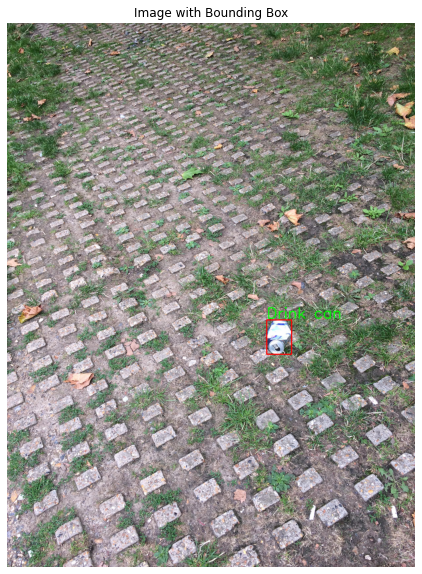

Image: (2448, 3264, 3)
Coordinates: (1626, 1383), (2047, 1622)


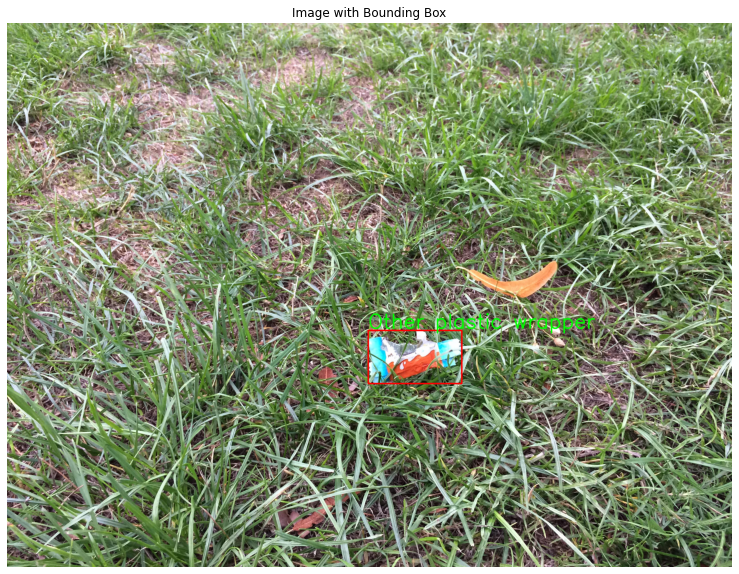

Image: (2756, 2867, 3)
Coordinates: (1139, 2279), (1206, 2339)


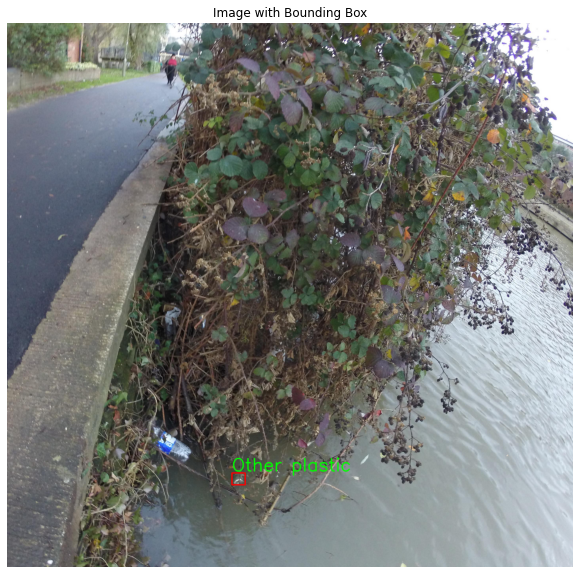

Image: (4000, 6000, 3)
Coordinates: (1813, 942), (4646, 2581)


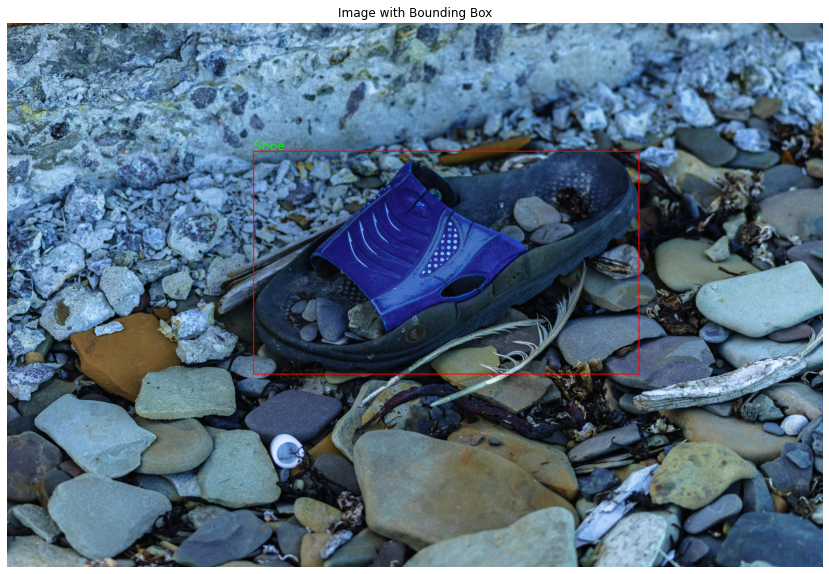

Image: (3264, 2448, 3)
Coordinates: (1395, 1845), (1596, 1952)


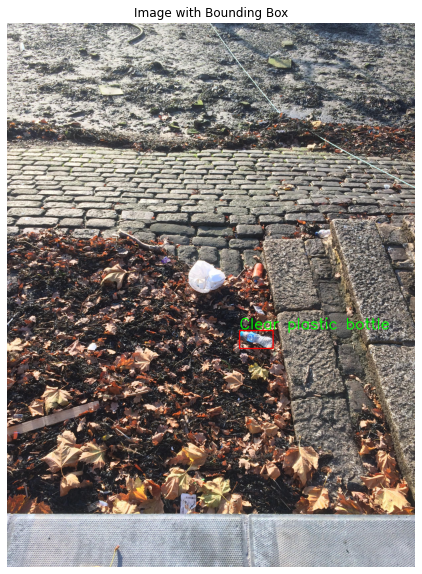

In [ ]:
for img_id in random.sample(list(least_objects_img_ids), 5):
  plot_bbox(img_id)

In [ ]:
plot_bbox(550)

Image: (4032, 3024, 3)
Coordinates: (1057, 1770), (1904, 2245)


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/data/trainCSV.csv')

# for training
with open("annotation.txt", "w+") as f:
  for idx, row in train_df.iterrows():
      img = cv2.imread('/content/drive/MyDrive/data/' + row['img_file'])
      x1 = int(row['x'])
      x2 = int(row['x']+row['width'])
      y1 = int(row['y'])
      y2 = int(row['y']+row['height'])
      google_colab_file_path = '/content/drive/MyDrive/data'
      fileName = os.path.join(google_colab_file_path, row['img_file'])
      className = row['cat_name']
      f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/data/testCSV.csv')

# for training
with open("test_annotation.txt", "w+") as f:
  for idx, row in test_df.iterrows():
      img = cv2.imread('/content/drive/MyDrive/data/' + row['img_file'])
      x1 = int(row['x'])
      x2 = int(row['x']+row['width'])
      y1 = int(row['y'])
      y2 = int(row['y']+row['height'])

      google_colab_file_path = '/content/drive/MyDrive/data'
      fileName = os.path.join(google_colab_file_path, row['img_file'])
      className = row['cat_name']
      f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')

In [ ]:
val_df = pd.read_csv('/content/drive/MyDrive/data/valCSV.csv')

# for training
with open("val_annotation.txt", "w+") as f:
  for idx, row in val_df.iterrows():
      img = cv2.imread('/content/drive/MyDrive/data/' + row['img_file'])
      x1 = int(row['x'])
      x2 = int(row['x']+row['width'])
      y1 = int(row['y'])
      y2 = int(row['y']+row['height'])
      google_colab_file_path = '/content/drive/MyDrive/data'
      fileName = os.path.join(google_colab_file_path, row['img_file'])
      className = row['cat_name']
      f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')